# IQR
it is use when your data distribution is skew 

In this method by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set. Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers.

1) Q1 represents the 1st quartile/25th percentile of the data.
2) Q2 represents the 2nd quartile/median/50th percentile of the data.
3) Q3 represents the 3rd quartile/75th percentile of the data.
4) (Q1–1.5IQR) represent the smallest value in the data set and (Q3+1.5IQR) represent the largest value in the data set

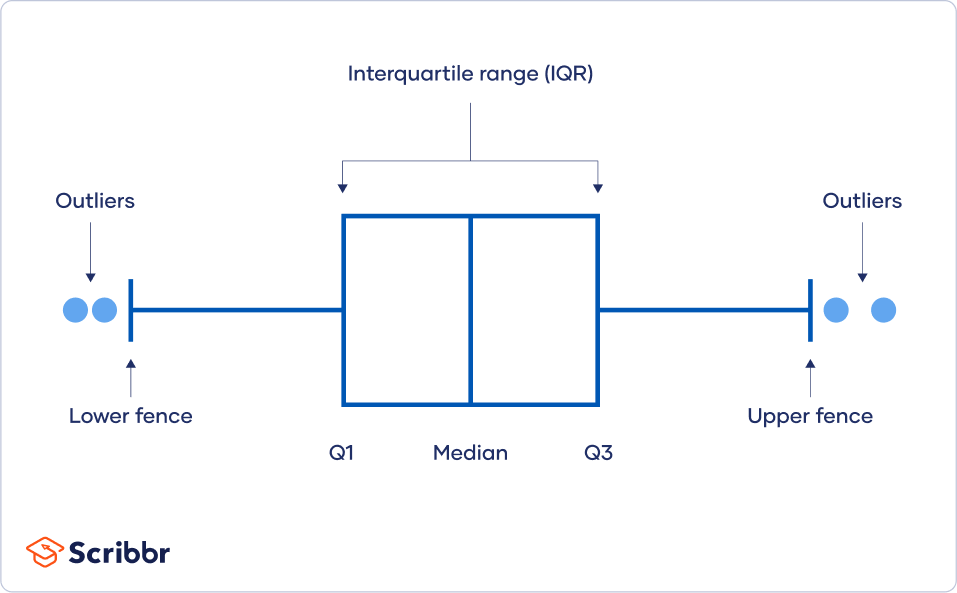

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\Dell\AppData\Local\Temp\ipykernel_26228\4260214945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_26228\4260214945.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function

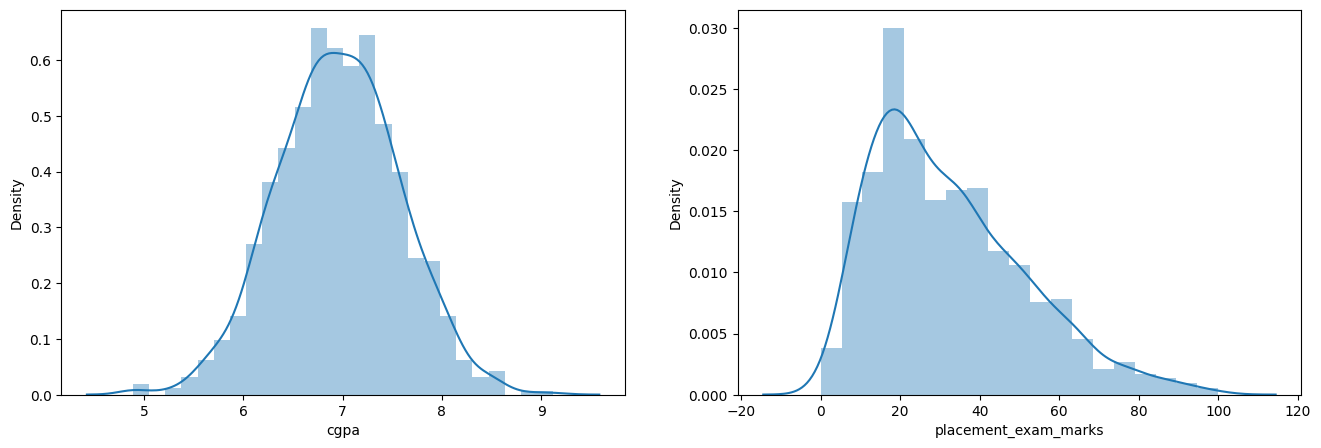

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [4]:
df['placement_exam_marks'].skew()  # it is right skew

0.8356419499466834

In [5]:
df['cgpa'].skew()  # it is almost zero so, it is not skew 

-0.014529938929314918

In [8]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [10]:
df['placement_exam_marks'].describe()['75%']

44.0

<AxesSubplot: >

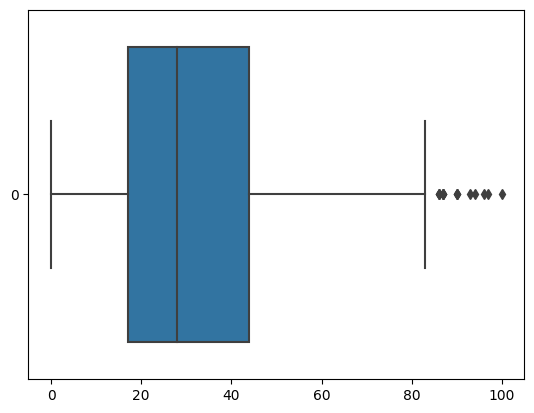

In [16]:
sns.boxplot(df['placement_exam_marks'],orient='h')

In [17]:
#find the IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [18]:
percentile75

44.0

In [19]:
iqr=percentile75-percentile25
iqr

27.0

In [20]:
upper_limit = percentile75+1.5*iqr
lower_limit= percentile25-1.5*iqr

In [21]:
upper_limit

84.5

In [23]:
lower_limit

-23.5

# find the outliers

In [24]:
df[(df['placement_exam_marks']>upper_limit)|(df['placement_exam_marks']<lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# trimming

In [30]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [31]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\Dell\AppData\Local\Temp\ipykernel_26228\2707909393.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_26228\2707909393.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figur

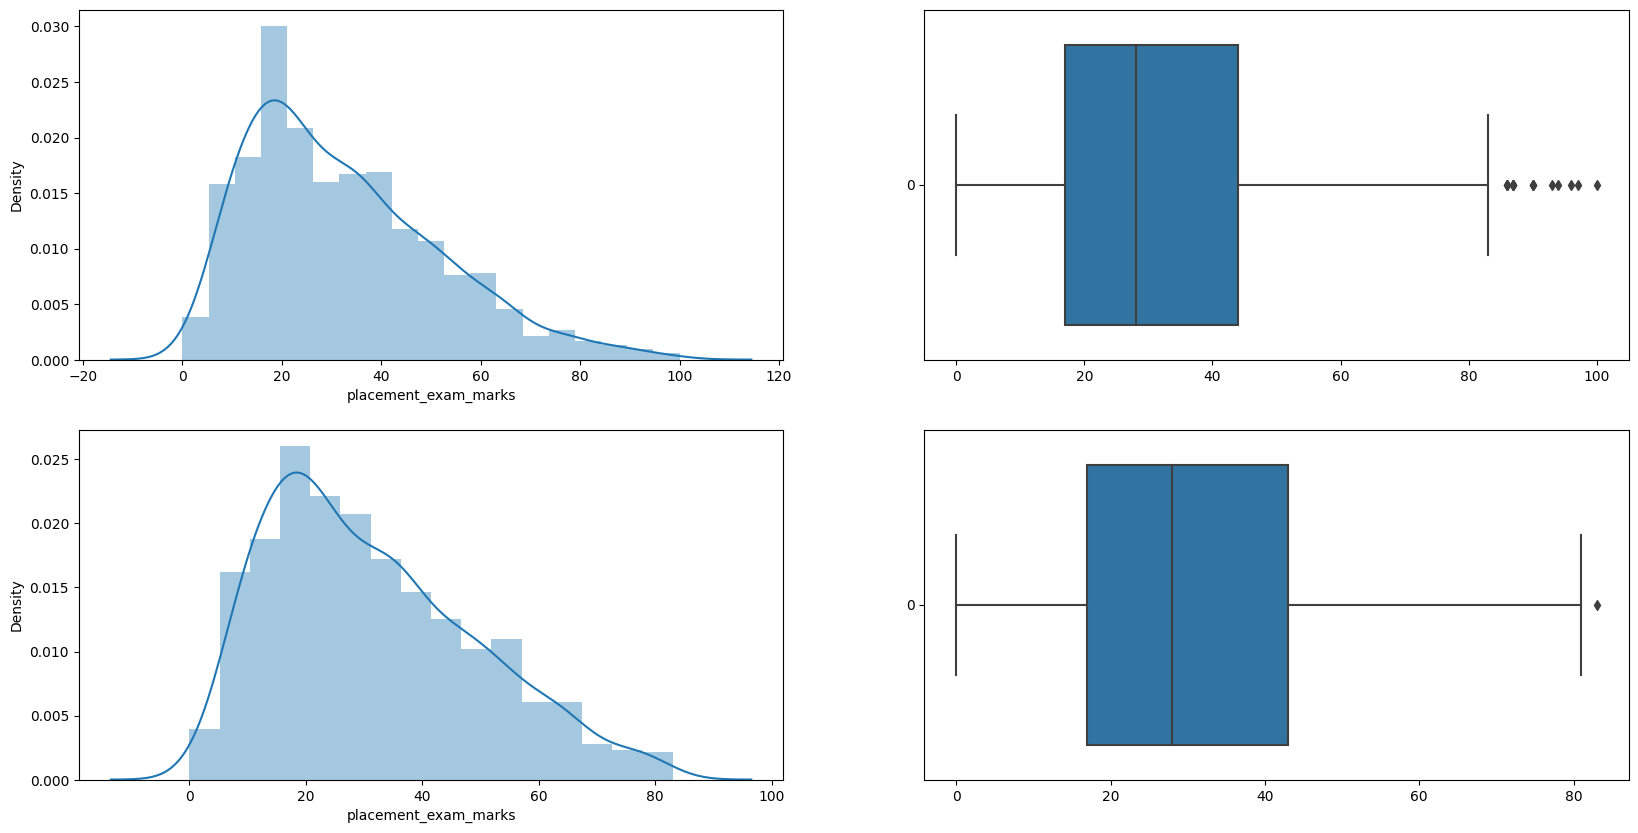

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')
plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],orient='h')
plt.show()


# capping

In [38]:
new_df_cap=df.copy()
new_df_cap['placement_exam_marks']=np.where(
new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
    new_df_cap['placement_exam_marks']<lower_limit,
    lower_limit,
    new_df_cap['placement_exam_marks'])
)

In [40]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\Dell\AppData\Local\Temp\ipykernel_26228\761682130.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_26228\761682130.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-

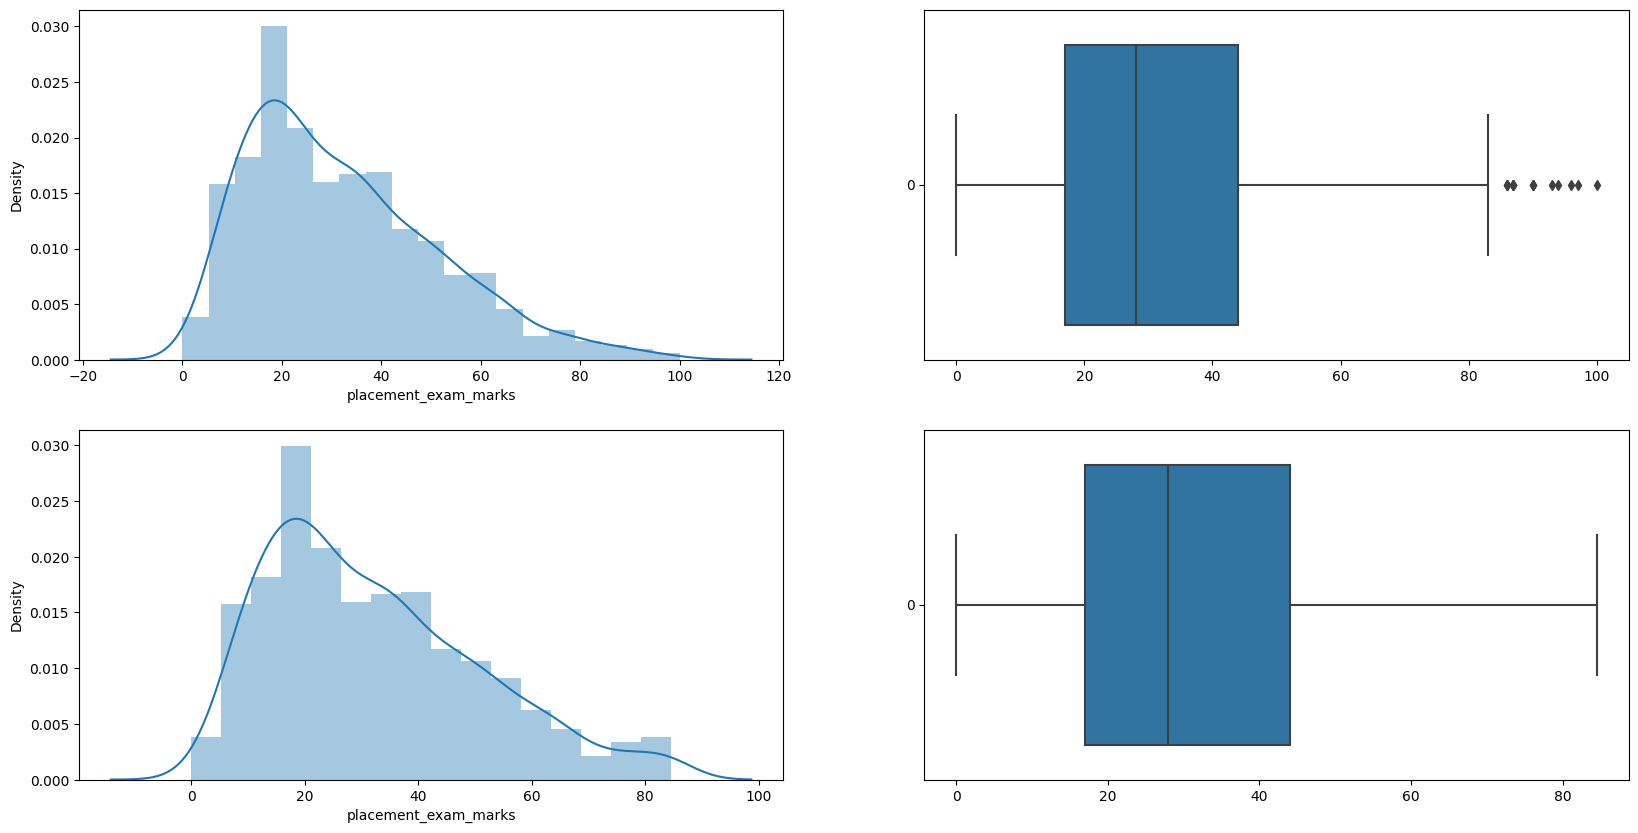

In [43]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')
plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'],orient='h')
plt.show()
